In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import pylab as plt


In [42]:
regression=pd.read_csv("regression_data.csv", sep= ";")
regression.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/09/2014,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/09/2014,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [43]:
#Eliminamos la columna 'date', puesto que no sera utilizada en el análisis posterior.
regression.drop('date', axis=1, inplace=True)
regression.head(10)
     

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
5,7237550310,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000
6,1321400060,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,257500
7,2008000270,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,291850
8,2414600126,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,229500
9,3793500160,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,323000


In [44]:

#Mostramos la cantidad de filas totales existentes en los datos a analizar.
print('Cantidad de filas: ', regression.shape[0]) 

Cantidad de filas:  21597


In [45]:
#Empezamos a analizar los valores únicos

#Mostramos la columna 'bedrooms' del documento
regression['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [46]:
#Mostramos la columna 'bathrooms' del documento 
regression['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [47]:
#Mostramos la columna 'floors' del documento 
regression['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [48]:
#Mostramos la columna 'condition' del documento 
regression['condition'].unique()

array([3, 5, 4, 1, 2])

In [49]:
#Mostramos la columna 'grade' del documento 
regression['grade'].unique()


array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [50]:
#Ordenamos los datos en orden decreciente según el precio de la casa. 
regression.sort_values(by='price', ascending=False).head(10)['id'] 
#Mostramos los ids de las 10 casas más caras.


7245    6762700020
3910    9808700762
9245    9208900037
4407    2470100110
1446    8907500070
1313    7558700030
1162    1247600105
8085    1924059029
2624    7738500731
8629    3835500195
Name: id, dtype: int64

In [51]:
#Precio medio de las casas.
regression['price'].mean()

540296.5735055795

In [52]:
#Utilizamos la funcion 'groupby' y agrupamos los datos segun la columna 'bedrooms'.
#Calculamos el promedio de la columna 'price'
regression.groupby('bedrooms')['price'].mean()


bedrooms
1     3.182395e+05
2     4.013877e+05
3     4.662766e+05
4     6.355647e+05
5     7.868741e+05
6     8.258535e+05
7     9.514478e+05
8     1.105077e+06
9     8.939998e+05
10    8.200000e+05
11    5.200000e+05
33    6.400000e+05
Name: price, dtype: float64

In [53]:
#Agrupamos los datos segun la columna 'bedrooms' y calculamos el promedio de la columna 'sqft_living' 
regression.groupby('bedrooms')['sqft_living'].mean()

bedrooms
1      888.153061
2     1239.752899
3     1805.837235
4     2554.649666
5     3047.545284
6     3284.341912
7     3974.210526
8     3800.000000
9     3775.000000
10    3706.666667
11    3000.000000
33    1620.000000
Name: sqft_living, dtype: float64

In [54]:
#Imprimimos el precio medio de las casas con 'waterfront'
regression[regression['waterfront']==1]['price'].mean()

1662524.1840490797

In [55]:
#Imprimimos el precio medio de las casas sin 'waterfront'
regression[regression['waterfront']==0]['price'].mean()

531762.32415788

In [37]:
#Observamos si existe alguna correlacion entre las variables 'condition' y 'grade' 
regression[['condition', 'grade']].corr()


,condition,grade
condition,1.000000,-0.146896
grade,-0.146896,1.000000


La grafica mostrada a continuación indica el estado de correlacion.


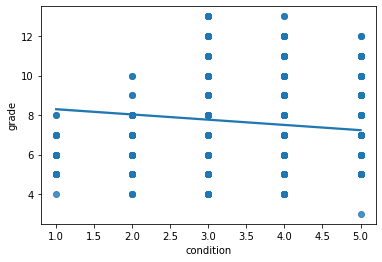

In [57]:
#Dibujamos una gráfica para poder comprobar si hay correlación positiva, negativa o no hay correlacion alguna entre los datos.
sns.regplot(x='condition', y='grade', data=regression)
print("La grafica mostrada a continuación indica el estado de correlacion.")

In [23]:
print("Observamos que entre ambas variables, 'condition' y 'grade', existe una correlación positiva, por lo que a mayor condición del inmueble, mayor será su calificación. Esto tiene sentido, ya que un inmueble en buenas condiciones tendrá una mejor calificación si lo comparamos con uno en malas condiciones.")

Observamos que entre ambas variables, 'condition' y 'grade', existe una correlación positiva, por lo que a mayor condición del inmueble, mayor será su calificación. Esto tiene sentido, ya que un inmueble en buenas condiciones tendrá una mejor calificación si lo comparamos con uno en malas condiciones.


In [58]:
#Mostramos las casas segun sus condiciones

#Cantidad de casas segun sus condiciones
regression['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [25]:
#Cantidad de casas por baños
regression['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [26]:
#Cantidad de casas por pisos
regression['floors'].value_counts()


1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [27]:
#Cantidad de casas por calificacion
regression['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [28]:
#Cantidad de casas por precio
regression['price'].value_counts()

450000    172
350000    172
550000    159
500000    152
425000    150
         ... 
278800      1
439888      1
354901      1
942000      1
402101      1
Name: price, Length: 3622, dtype: int64

In [59]:
#Un cliente nos pide que encontremos una casa con las siguientes categorias:

    #3 o 4 habitaciones
    #Más de 3 baños
    #1 planta
    #Sin tenga vistas al lago
    #Tiene que tener por lo menos un 3 de condición
    #La calificacion tiene que ser al menos de un 5
    #El precio tiene que ser menos de 300000

#Creamos una variable que contenga los datos de las casas que cumplen con las condiciones requeridas
regression[((regression['bedrooms']==3) | (regression['bedrooms']==4)) &  (regression['bathrooms']>3) &  (regression['floors']==1) & (regression['waterfront']==0) & (regression['condition']>=3) & (regression['grade']>=5) & (regression['price']<300000)]


     

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price


In [60]:
print("No es posible recomendarle al cliente ninguna casa con las condiciones que ha solicitado, por lo tanto la lista se entrega vacia.")

No es posible recomendarle al cliente ninguna casa con las condiciones que ha solicitado, por lo tanto la lista se entrega vacia.


In [62]:
#Mostramos las casas cuyo precio es el doble que la media
regression[regression['price']>(regression['price'].mean()*2)]

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
5,7237550310,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000
21,2524049179,3,2.75,3050,44867,1.0,0,4,3,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336,2000000
49,822039084,3,2.50,2753,65005,1.0,1,2,5,9,2165,588,1953,0,98070,47.4041,-122.451,2680,72513,1350000
69,1802000060,5,2.25,3200,20158,1.0,0,0,3,8,1600,1600,1965,0,98004,47.6303,-122.215,3390,20158,1330000
91,5036300431,5,2.75,3520,6353,2.0,0,0,4,10,3520,0,2001,0,98199,47.6506,-122.391,2520,6250,1100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21560,9253900271,5,4.50,4850,10584,2.0,1,4,3,10,3540,1310,2007,0,98008,47.5943,-122.110,3470,18270,3570000
21574,7430200100,4,3.50,4910,9444,1.5,0,0,3,11,3110,1800,2007,0,98074,47.6502,-122.066,4560,11063,1220000
21577,8672200110,5,3.75,4170,8142,2.0,0,2,3,10,4170,0,2006,0,98056,47.5354,-122.181,3030,7980,1090000
21581,191100405,4,3.25,3410,10125,2.0,0,0,3,10,3410,0,2007,0,98040,47.5653,-122.223,2290,10125,1580000


In [32]:
#Obtenemos la diferencia entre el precio medio de las casas con 3 habitaciones y las casas con 4 habitaciones
regression[regression['bedrooms']==4]['price'].mean() - regression[regression['bedrooms']==3]['price'].mean()


     

169288.0862289045

In [33]:
#Mostramos los distintos codigos postales
regression['zipcode'].unique()


array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [63]:
#Mostramos las casas que han sido renovadas
regression[regression['yr_renovated']>0] 

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
35,9547205180,3,2.50,2300,3060,1.5,0,0,3,8,1510,790,1930,2002,98115,47.6827,-122.310,1590,3264,696000
95,1483300570,4,2.50,3300,10250,1.0,0,0,3,7,2390,910,1946,1991,98040,47.5873,-122.249,1950,6045,905000
103,2450000295,3,2.50,2920,8113,2.0,0,0,3,8,2920,0,1950,2010,98004,47.5814,-122.196,2370,8113,1090000
115,3626039325,3,3.50,4380,6350,2.0,0,0,3,8,2780,1600,1900,1999,98117,47.6981,-122.368,1830,6350,740500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19606,7351200295,3,1.75,1760,6788,2.0,1,4,3,7,1760,0,1940,1960,98125,47.7336,-122.284,1630,7588,1150000
20041,126039256,3,2.00,1520,5040,2.0,0,0,3,7,1520,0,1977,2006,98177,47.7770,-122.362,1860,8710,434900
20428,4305600360,4,2.50,2400,9612,1.0,0,0,3,8,1230,1170,1962,2009,98059,47.4799,-122.127,2430,5539,500012
20431,3319500628,3,1.50,1010,1546,2.0,0,0,3,8,1010,0,1971,2014,98144,47.5998,-122.311,1010,1517,356999


In [35]:
#Imprimimos los detalles de la 11º casa mas cara del dataset 
regression.sort_values(by='price', ascending=False).head(11).iloc[10] 

id               6.065300e+09
bedrooms         5.000000e+00
bathrooms        6.000000e+00
sqft_living      7.440000e+03
sqft_lot         2.154000e+04
floors           2.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            1.200000e+01
sqft_above       5.550000e+03
sqft_basement    1.890000e+03
yr_built         2.003000e+03
yr_renovated     0.000000e+00
zipcode          9.800600e+04
lat              4.756920e+01
long            -1.221890e+02
sqft_living15    4.740000e+03
sqft_lot15       1.932900e+04
price            4.210000e+06
Name: 12358, dtype: float64